In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("nonbots_data.csv",encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1176 non-null   float64
 1   id_str                 1176 non-null   object 
 2   screen_name            1176 non-null   object 
 3   location               901 non-null    object 
 4   description            1007 non-null   object 
 5   url                    739 non-null    object 
 6   followers_count        1176 non-null   int64  
 7   friends_count          1176 non-null   int64  
 8   listedcount            1176 non-null   int64  
 9   created_at             1176 non-null   object 
 10  favourites_count       1176 non-null   int64  
 11  verified               1176 non-null   bool   
 12  statuses_count         1176 non-null   int64  
 13  lang                   1176 non-null   object 
 14  status                 1070 non-null   object 
 15  defa

In [3]:
df.head(100)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,3.471604e+07,34716038,aaroncarter,Sony Recording Artist,NEW AARON CARTER MUSIC DOWNLOAD LINK LÌüVÌÇ EP...,NaN,571310,76070,4909,Thu Apr 23 20:15:49 +0000 2009,37437,True,56077,en,"{u'contributors': None, u'truncated': False, u...",False,False,True,Aaron Carter,0
1,3.013511e+06,3013511,michellebranch,NaN,"singer/songwriter, hopeless romantic, drinker ...",https://t.co/2vSKw7cmzC,292385,963,6076,Fri Mar 30 20:58:59 +0000 2007,1248,True,16688,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Michelle Branch,0
2,5.623762e+07,56237623,stronginmyfaith,NaN,NaN,NaN,1,7,0,7/13/2009 0:38,0,False,3,en,"Status(contributors=None, truncated=False, tex...",True,True,False,laurie lindeman,0
3,2.796428e+07,27964284,Jessicaveronica,5th Dimension,"@TheVeronicas Ü Wanderer, worshiper, if you ...",https://t.co/U6yNZoDZfu,222659,352,3261,Tue Mar 31 21:12:33 +0000 2009,143,True,10999,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Jessica Veronica,0
4,5.528761e+08,552876065,resargento,brasil,meio ogra mas o coraí_í£o í© de mocinha,NaN,646,446,2,4/13/2012 17:37,13440,False,25292,pt,NaN,False,False,False,rebosta,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.845567e+07,48455672,NYUWasserman,"New York, NY",NYU Wasserman Center for Career Development. ...,http://t.co/6hjLD2IKxF,8896,417,347,6/18/2009 19:16,797,False,9936,en,"Status(in_reply_to_status_id_str=None, favorit...",False,False,False,NYU Wasserman,0
96,3.262112e+09,3262112372,jakeborge,NaN,Mel is awesome,NaN,77,65,0,6/30/2015 19:52,22,False,17,en,"{'retweet_count': 1, 'lang': 'en', 'retweeted'...",True,False,False,Jacob Borgerding,0
97,1.330040e+08,133004044,naihadmohan,Delhi,NaN,http://t.co/gugLO3MMMK,45,75,0,Wed Apr 14 19:21:03 +0000 2010,10,False,103,en,{'created_at': 'Tue Dec 29 06:26:03 +0000 2015...,False,False,False,Naihad Mohan,0
98,2.056686e+07,20566864,DJPROSTYLE,"NEW YORK, NY",Radio Personality/Dj/Producer/TV/Party Animal!...,https://t.co/d0B5dgn2kC,952135,858,3161,Wed Feb 11 02:50:30 +0000 2009,2402,True,83812,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,PROSTYLE,0


In [4]:
df.drop("name",axis=1,inplace=True)

In [5]:
df["default_profile"]=df["default_profile"].map({False:0,True:1})

In [6]:
df["has_extended_profile"]=df["has_extended_profile"].map({False:0,True:1})
df["default_profile_image"]=df["default_profile_image"].map({False:0,True:1})

In [7]:
df.isnull().sum()

id                         0
id_str                     0
screen_name                0
location                 275
description              169
url                      437
followers_count            0
friends_count              0
listedcount                0
created_at                 0
favourites_count           0
verified                   0
statuses_count             0
lang                       0
status                   106
default_profile            0
default_profile_image      0
has_extended_profile      40
bot                        0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='has_extended_profile', ylabel='Density'>

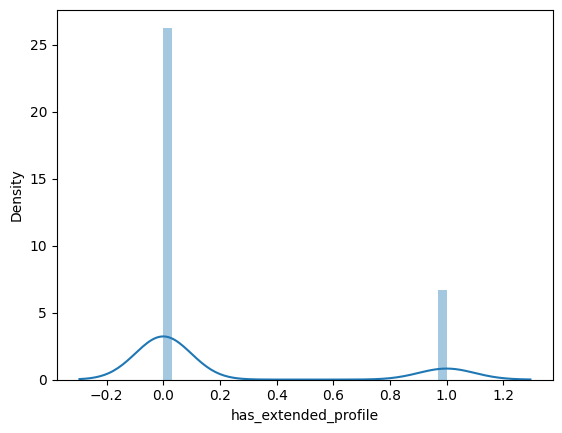

In [8]:
sns.distplot(df["has_extended_profile"])

In [9]:
df["has_extended_profile"].mode()[0]

0.0

In [10]:
df["has_extended_profile"].fillna(df["has_extended_profile"].mode()[0],inplace=True)

In [11]:
df["has_extended_profile"].isnull().sum()

0

In [12]:
df["has_extended_profile"]=df["has_extended_profile"].astype(int)

In [13]:
pd.set_option("display.max.columns",None)

In [14]:
df.drop("url",axis=1,inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df["lang"]=label_encoder.fit_transform(df["lang"])

In [16]:
df.head(1)

,id,id_str,screen_name,location,description,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,bot
0,34716038.0,34716038,aaroncarter,Sony Recording Artist,NEW AARON CARTER MUSIC DOWNLOAD LINK LÌüVÌÇ EP...,571310,76070,4909,Thu Apr 23 20:15:49 +0000 2009,37437,True,56077,9,"{u'contributors': None, u'truncated': False, u...",0,0,1,0


In [17]:
df["verified"]=df["verified"].map({False:0,True:1})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1176 non-null   float64
 1   id_str                 1176 non-null   object 
 2   screen_name            1176 non-null   object 
 3   location               901 non-null    object 
 4   description            1007 non-null   object 
 5   followers_count        1176 non-null   int64  
 6   friends_count          1176 non-null   int64  
 7   listedcount            1176 non-null   int64  
 8   created_at             1176 non-null   object 
 9   favourites_count       1176 non-null   int64  
 10  verified               1176 non-null   int64  
 11  statuses_count         1176 non-null   int64  
 12  lang                   1176 non-null   int32  
 13  status                 1070 non-null   object 
 14  default_profile        1176 non-null   int64  
 15  defa

In [19]:
df.drop("id",axis=1,inplace=True)

In [20]:
df.drop("id_str",axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   screen_name            1176 non-null   object
 1   location               901 non-null    object
 2   description            1007 non-null   object
 3   followers_count        1176 non-null   int64 
 4   friends_count          1176 non-null   int64 
 5   listedcount            1176 non-null   int64 
 6   created_at             1176 non-null   object
 7   favourites_count       1176 non-null   int64 
 8   verified               1176 non-null   int64 
 9   statuses_count         1176 non-null   int64 
 10  lang                   1176 non-null   int32 
 11  status                 1070 non-null   object
 12  default_profile        1176 non-null   int64 
 13  default_profile_image  1176 non-null   int64 
 14  has_extended_profile   1176 non-null   int32 
 15  bot                  

In [22]:
df.drop("screen_name",axis=1,inplace=True)

In [23]:
df.drop(["location","description"],axis=1,inplace=True)

In [24]:
df["created_at"].str.split(" ")

0       [Thu, Apr, 23, 20:15:49, +0000, 2009]
1       [Fri, Mar, 30, 20:58:59, +0000, 2007]
2                           [7/13/2009, 0:38]
3       [Tue, Mar, 31, 21:12:33, +0000, 2009]
4                          [4/13/2012, 17:37]
                        ...                  
1171    [Tue, Apr, 07, 20:55:37, +0000, 2009]
1172    [Tue, Oct, 11, 13:59:35, +0000, 2011]
1173    [Wed, Apr, 22, 00:14:58, +0000, 2009]
1174    [Sun, May, 24, 15:23:09, +0000, 2009]
1175                       [12/20/2011, 7:22]
Name: created_at, Length: 1176, dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   followers_count        1176 non-null   int64 
 1   friends_count          1176 non-null   int64 
 2   listedcount            1176 non-null   int64 
 3   created_at             1176 non-null   object
 4   favourites_count       1176 non-null   int64 
 5   verified               1176 non-null   int64 
 6   statuses_count         1176 non-null   int64 
 7   lang                   1176 non-null   int32 
 8   status                 1070 non-null   object
 9   default_profile        1176 non-null   int64 
 10  default_profile_image  1176 non-null   int64 
 11  has_extended_profile   1176 non-null   int32 
 12  bot                    1176 non-null   int64 
dtypes: int32(2), int64(9), object(2)
memory usage: 110.4+ KB


In [28]:
df.drop("status",axis=1,inplace=True)

In [34]:
pd.set_option("display.max.rows",None)
df.drop("created_at",axis=1,inplace=True)

In [36]:
df.isnull().sum()

followers_count          0
friends_count            0
listedcount              0
favourites_count         0
verified                 0
statuses_count           0
lang                     0
default_profile          0
default_profile_image    0
has_extended_profile     0
bot                      0
dtype: int64

In [37]:
df.to_csv("Bot_data_after_cleaning")